<a href="https://colab.research.google.com/github/echoheqian/project/blob/master/dbgap_sleep_cvds_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A complete ML Pipeline Tutorial 

## 1. import packages needed for ML

In [ ]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

## set a seed for code reproducibility 

In [ ]:
SEED = 7
np.random.seed(SEED)
pd.set_option('display.max_columns', 180)

## 2. Data preparing

### Loading data

In [ ]:
df = (pd.read_csv('pheno.prs.0410.csv', sep="\t"))
# getting dataframe columns names
df_name = df.columns
print(df.head())
print(df.shape)
print(df_name)

          FID         IID  subjID  age    sex   race  dm_trial  \
0  D100009-41  D100009-41  858872   59  False  white     False   
1  D100015-30  D100015-30  729271   51  False  white      True   
2  D100048-40  D100048-40  794958   70  False  white      True   
3  D100058-61  D100058-61  857633   69  False  white     False   
4  D100110-66  D100110-66  791868   67  False  white     False   

   dm_intervention  smk_now  visit_year    sbp   dbp       bmi    glu   chol  \
0            False      0.0           0  115.0  80.0  35.62579  265.0  283.0   
1             True      0.0           0  125.0  84.0  41.22847  104.0  215.0   
2            False      NaN           0  176.0  92.0  22.30924   84.0  288.0   
3            False      0.0           0  112.0  61.0  32.26933    NaN    NaN   
4            False      NaN           0  123.0  75.0  32.25674   93.0  245.0   

     ldl   hdl     tg   insu  hsCRP     tot_cal       fat        pro  \
0  185.0  68.0  151.0  113.0   7.10  2909.92283  8

In [ ]:
## 2023-04-09 try my own dataset
cols = ['age','dm_trial',
        'sbp','dbp','bmi','glu','chol','ldl','hdl','tg','insu',
        'tot_cal','baseline_fat','baseline_pro','baseline_cho','baseline_sfa','baseline_mufa',
        'baseline_pufa','baseline_alc','baseline_fiber','baseline_fruit','baseline_veg','baseline_palm',
        'baseline_linoleic','baseline_n3','baseline_n6','baseline_sodium','baseline_nuts','baseline_grains',
        'baseline_dairy','baseline_fish','hei',
        'baseline_sleepdis','baseline_mse','baseline_ces_d',
        'delta_sleep',
        'coffee','time_walk_10min','cvd_his','hypertension_his','cancer_his',
        'SCORE_baseline_sleep_p0.05_0.05', 'SCORE_inso_all_group',
        'mi','chd','isch_stroke','hemo_stroke','dm']
df = (pd.read_csv('pheno.prs.0410.csv', sep="\t")
        .filter(cols)
        .query('dm_trial==True')
        .drop('dm_trial', axis=1))
df.shape

(5832, 37)

In [ ]:
df_name = df.columns
df_name

Index(['age', 'sbp', 'dbp', 'bmi', 'glu', 'chol', 'ldl', 'hdl', 'tg', 'insu',
       'tot_cal', 'baseline_fat', 'baseline_pro', 'baseline_cho',
       'baseline_sfa', 'baseline_mufa', 'baseline_pufa', 'baseline_alc',
       'baseline_palm', 'baseline_n3', 'hei', 'baseline_sleepdis',
       'baseline_mse', 'baseline_ces_d', 'delta_sleep', 'coffee',
       'time_walk_10min', 'cvd_his', 'hypertension_his', 'cancer_his',
       'SCORE_baseline_sleep_p0.05_0.05', 'SCORE_inso_all_group', 'mi', 'chd',
       'isch_stroke', 'hemo_stroke', 'dm'],
      dtype='object')

In [ ]:
def get_cvd_type(x):
  if x['mi'] == 1 or x['chd'] ==1 or x['dm'] ==1 or x['isch_stroke']==1 or x['hemo_stroke']==1:
    return 1
  else: 
    return 0
df.loc[:, 'cvd_binary'] = df.apply(get_cvd_type, axis=1)
print(df['cvd_binary'].value_counts())

0    4473
1    1359
Name: cvd_binary, dtype: int64


In [ ]:
df = (df.drop(['mi','chd','hemo_stroke','isch_stroke','dm'], axis=1))
df_name = df.columns
df_name

Index(['age', 'sbp', 'dbp', 'bmi', 'glu', 'chol', 'ldl', 'hdl', 'tg', 'insu',
       'tot_cal', 'baseline_fat', 'baseline_pro', 'baseline_cho',
       'baseline_sfa', 'baseline_mufa', 'baseline_pufa', 'baseline_alc',
       'baseline_palm', 'baseline_n3', 'hei', 'baseline_sleepdis',
       'baseline_mse', 'baseline_ces_d', 'delta_sleep', 'coffee',
       'time_walk_10min', 'cvd_his', 'hypertension_his', 'cancer_his',
       'SCORE_baseline_sleep_p0.05_0.05', 'SCORE_inso_all_group',
       'cvd_binary'],
      dtype='object')

### 2.1 Analyze Data
#### 2.1.1 Descriptive statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5832 entries, 1 to 16581
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              5832 non-null   int64  
 1   sbp                              5832 non-null   float64
 2   dbp                              5832 non-null   float64
 3   bmi                              5816 non-null   float64
 4   glu                              2732 non-null   float64
 5   chol                             2715 non-null   float64
 6   ldl                              2661 non-null   float64
 7   hdl                              2714 non-null   float64
 8   tg                               2715 non-null   float64
 9   insu                             2652 non-null   float64
 10  tot_cal                          5832 non-null   float64
 11  baseline_fat                     5832 non-null   float64
 12  baseline_pro       

In [ ]:
df.head()

,age,sbp,dbp,bmi,glu,chol,ldl,hdl,tg,insu,tot_cal,baseline_fat,baseline_pro,baseline_cho,baseline_sfa,baseline_mufa,baseline_pufa,baseline_alc,baseline_palm,baseline_n3,hei,baseline_sleepdis,baseline_mse,baseline_ces_d,delta_sleep,coffee,time_walk_10min,cvd_his,hypertension_his,cancer_his,SCORE_baseline_sleep_p0.05_0.05,SCORE_inso_all_group,cvd_binary
1,51,125.0,84.0,41.22847,104.0,215.0,149.0,36.0,150.0,70.0,1524.63584,66.72611,60.70822,155.72613,13.92200,24.03499,23.54255,10.01349,8.64331,2.54322,63.98034,7.0,NaN,0.00144,-4.0,1.0,0.0,0.0,0.0,0.0,557.363,0.000207,0
2,70,176.0,92.0,22.30924,84.0,288.0,203.0,73.0,62.0,NaN,1228.53449,40.19991,58.67646,160.10975,13.59158,14.54817,8.02075,0.00493,7.44353,0.82732,67.62396,5.0,85.0,0.00552,-1.0,1.0,4.0,0.0,1.0,0.0,545.961,0.000162,0
5,54,104.0,69.0,26.87263,105.0,219.0,152.5,50.5,77.5,34.2,2456.97239,109.57551,105.39777,268.58096,40.51814,37.89930,22.66372,0.04528,21.16896,2.34198,56.51048,0.0,NaN,0.00144,8.0,1.0,1.0,0.0,0.0,0.0,559.216,0.000280,0
10,64,133.0,84.0,28.91433,NaN,NaN,NaN,NaN,NaN,NaN,1342.39753,60.72256,66.03346,135.05701,19.13607,21.25042,15.35011,0.85690,10.43022,1.81833,71.94189,1.0,NaN,0.00144,0.0,1.0,1.0,0.0,0.0,0.0,546.154,0.000221,0
17,62,137.0,86.0,31.43576,NaN,NaN,NaN,NaN,NaN,NaN,927.45758,35.68079,47.81902,94.63045,10.81763,14.23365,7.57422,6.22589,5.98474,1.29323,74.03998,6.0,NaN,0.00144,-2.0,1.0,3.0,1.0,1.0,0.0,542.074,0.000187,0


In [ ]:
df.describe()

,age,sbp,dbp,bmi,glu,chol,ldl,hdl,tg,insu,tot_cal,baseline_fat,baseline_pro,baseline_cho,baseline_sfa,baseline_mufa,baseline_pufa,baseline_alc,baseline_palm,baseline_n3,hei,baseline_sleepdis,baseline_mse,baseline_ces_d,delta_sleep,coffee,time_walk_10min,cvd_his,hypertension_his,cancer_his,SCORE_baseline_sleep_p0.05_0.05,SCORE_inso_all_group,cvd_binary
count,16588.000000,16586.000000,16584.000000,16501.000000,10135.000000,10074.000000,9908.000000,10072.000000,10074.000000,9839.000000,16588.000000,16588.000000,16588.000000,16588.000000,16588.000000,16588.000000,16588.000000,16588.000000,16588.000000,16588.000000,16588.000000,16253.000000,6104.000000,16189.000000,10659.000000,16498.000000,16529.000000,15356.000000,16465.000000,16440.000000,16588.000000,16588.000000,16588.000000
mean,66.762901,130.000241,74.973257,28.395698,102.928474,234.477070,152.144631,52.554994,150.308914,52.867359,1639.952725,62.676554,68.497364,198.208391,21.341093,23.710001,12.718701,5.357492,11.369725,1.431211,66.559664,6.871839,95.654653,0.032654,0.441317,0.767245,2.363785,0.183576,0.362101,0.059672,550.807822,0.000192,0.232638
std,6.689960,17.845005,9.202953,5.696183,30.555610,39.726102,35.539844,12.645886,84.333534,48.064029,664.291361,33.290357,29.676055,80.493641,12.122196,12.814594,7.023306,9.900395,6.232662,0.775940,10.788708,4.447813,4.114573,0.111039,4.390192,0.422601,1.601056,0.387151,0.480623,0.236884,10.601114,0.000026,0.422526
min,50.000000,80.000000,40.000000,15.020410,35.000000,91.000000,26.000000,13.000000,17.000000,1.100000,4.869700,0.550680,0.002630,0.000330,0.206470,0.133480,0.180490,0.000000,0.101920,0.019400,22.251750,0.000000,-9.000000,0.000370,-18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,504.332000,0.000091,0.000000
25%,62.000000,118.000000,69.000000,24.165610,89.000000,207.000000,127.000000,44.000000,94.000000,26.000000,1188.080925,39.063318,47.798320,142.959873,12.691785,14.604388,7.820735,0.018870,6.948423,0.888595,59.185848,3.000000,94.000000,0.001440,-2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,545.410000,0.000175,0.000000
50%,67.000000,129.000000,75.000000,27.532290,95.000000,232.000000,150.000000,51.000000,131.000000,41.000000,1550.140430,56.611395,64.241055,188.598285,18.973190,21.409595,11.289505,0.991810,10.196525,1.275260,67.602425,6.000000,97.000000,0.001730,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,551.511500,0.000191,0.000000
75%,72.000000,141.000000,81.000000,31.647410,105.000000,259.000000,174.000000,60.000000,184.000000,65.000000,1980.153420,79.058970,84.130667,241.155430,27.205625,30.031885,15.929400,6.502365,14.416058,1.787530,74.932220,10.000000,98.000000,0.005070,3.000000,1.000000,4.000000,0.000000,1.000000,0.000000,557.447250,0.000209,0.000000
max,81.000000,209.000000,106.000000,60.913880,403.000000,499.000000,367.000000,131.000000,1523.000000,1699.000000,4861.929311,221.126882,215.437213,605.869078,78.203275,85.274341,46.447844,56.334208,40.834625,5.296784,92.234630,20.000000,100.000000,0.944430,20.000000,1.000000,5.000000,1.000000,1.000000,1.000000,621.942000,0.000334,1.000000


### 2.1.2 Detecting missing values

In [ ]:
## define count missing values function
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

## count missing values
df_missing = missing_values_table(df)
df_missing

Your selected dataframe has 33 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
baseline_mse,4443,76.2
insu,3180,54.5
ldl,3171,54.4
hdl,3118,53.5
chol,3117,53.4
tg,3117,53.4
glu,3100,53.2
delta_sleep,1192,20.4
cvd_his,683,11.7
baseline_ces_d,130,2.2


<Axes: >

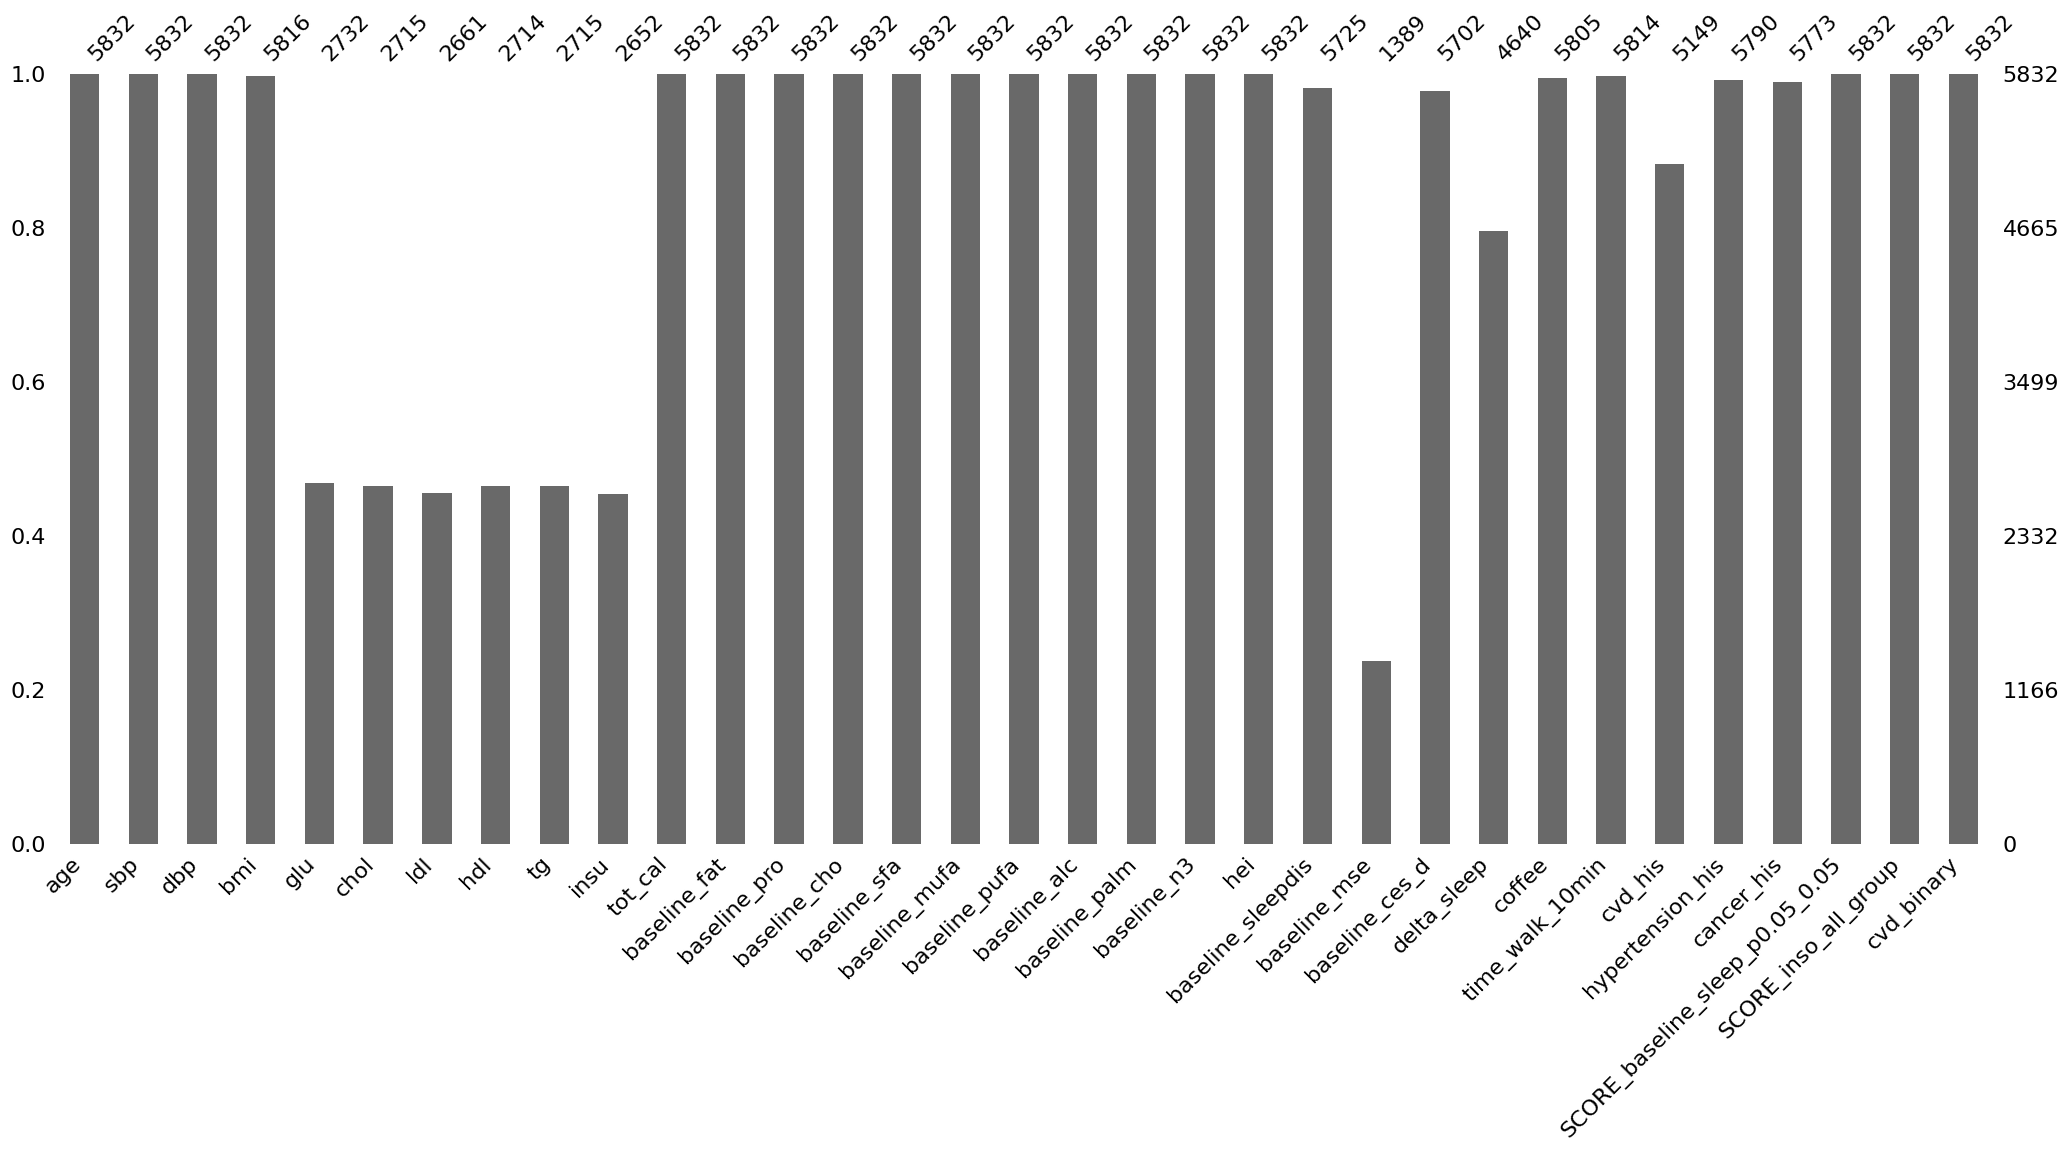

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
## deleting variables with missing values higher than 40%
missing_variables = ['baseline_mse','insu','ldl','hdl','chol','tg','glu']
df_update = (df.drop(missing_variables, axis = 1))

In [ ]:
missing_values_table(df_update)

Your selected dataframe has 26 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
delta_sleep,1192,20.4
cvd_his,683,11.7
baseline_ces_d,130,2.2
baseline_sleepdis,107,1.8
cancer_his,59,1.0
hypertension_his,42,0.7
coffee,27,0.5
time_walk_10min,18,0.3
bmi,16,0.3


### Impute missing values by using MICE

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer(imputation_order='ascending',max_iter=10,random_state=42,n_nearest_features=5)

#['insu','ldl','hdl','chol','tg','glu','sbp','dbp',
variables = ['delta_sleep','baseline_ces_d','baseline_sleepdis','bmi','cvd_his','hypertension_his','coffee','time_walk_10min','cancer_his']
for i in variables:
  df_update[i] = mice_imputer.fit_transform(df_update[[i]])
  

In [ ]:
missing_values_table(df_update)

Your selected dataframe has 26 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
df_name = df_update.columns
df_name

Index(['age', 'sbp', 'dbp', 'bmi', 'tot_cal', 'baseline_fat', 'baseline_pro',
       'baseline_cho', 'baseline_sfa', 'baseline_mufa', 'baseline_pufa',
       'baseline_alc', 'baseline_palm', 'baseline_n3', 'hei',
       'baseline_sleepdis', 'baseline_ces_d', 'delta_sleep', 'coffee',
       'time_walk_10min', 'cvd_his', 'hypertension_his', 'cancer_his',
       'SCORE_baseline_sleep_p0.05_0.05', 'SCORE_inso_all_group',
       'cvd_binary'],
      dtype='object')

### 2.2 Data visualization
####### let's look at our data in the most raw shape by using scatter plot

In [ ]:
g = sns.pairplot(df, hue = "mi", diag_kind="hist", palette = "husl")

### check the example pregenecy distribution

In [ ]:
def plotHist(df,nameOfFeature):
    cls_train = df[nameOfFeature]
    data_array = cls_train
    hist_data = np.histogram(data_array)
    binsize = .5

    trace1 = go.Histogram(
        x=data_array,
        name='Histogram of Wind Speed',
        autobinx=False,
        xbins=dict(
            start=df[nameOfFeature].min()-1,
            end=df[nameOfFeature].max()+1,
            size=binsize
        )
    )

    trace_data = [trace1]
    layout = go.Layout(
        bargroupgap=0.3,
         title='The distribution of ' + nameOfFeature,
        xaxis=dict(
            title=nameOfFeature,
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Number of labels',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
    fig = go.Figure(data=trace_data, layout=layout)
    py.iplot(fig)

In [ ]:
plotHist(df_update,'age')

### Investagate each feature distribution for each outcome

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis
## define bar plot
def plotBarCat(df,feature,target):




    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
## define Describe float skewkurt
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[target]))
        print("{0} var  : ".format(target), np.var(df[target]))
        print("{0} skew : ".format(target), skew(df[target]))
        print("{0} kurt : ".format(target), kurtosis(df[target]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,target)

In [ ]:
plotBarCat(df_update,df_name[0],'mi')

In [ ]:
plotBarCat(df,df_name[1],'mi')

In [ ]:
plotBarCat(df,df_name[2],'mi')

In [ ]:
plotBarCat(df,df_name[3],'mi')

In [ ]:
plotBarCat(df,df_name[4],'mi')

In [ ]:
plotBarCat(df,df_name[5],'mi')

In [ ]:
plotBarCat(df,df_name[6],'mi')

In [ ]:
plotBarCat(df,df_name[7],'mi')

In [ ]:
plotBarCat(df,df_name[8],'mi')

### pie plot to check the proportion of outcome

In [ ]:
def PlotPie(df, nameOfFeature):
    labels = [str(df[nameOfFeature].unique()[i]) for i in range(df[nameOfFeature].nunique())]
    values = [df[nameOfFeature].value_counts()[i] for i in range(df[nameOfFeature].nunique())]

    trace=go.Pie(labels=labels,values=values)

    py.iplot([trace])

In [ ]:
PlotPie(df_update, 'mi')

## 2.3.1 Outlier investigation

In [ ]:
def OutLiersBox(df, nameOfFeature):
  trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

  trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

  trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

  trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

  data = [trace0,trace1,trace2,trace3]

  layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

  fig = go.Figure(data=data,layout=layout)
  py.iplot(fig, filename = "Outliers")

In [ ]:
OutLiersBox(df_update,df_name[0])

In [ ]:
OutLiersBox(df,df_name[1])

In [ ]:
OutLiersBox(df,df_name[2])

In [ ]:
OutLiersBox(df,df_name[3])

In [ ]:
OutLiersBox(df,df_name[4])

In [ ]:
OutLiersBox(df,df_name[5])

In [ ]:
OutLiersBox(df,df_name[6])

In [ ]:
OutLiersBox(df,df_name[7])

In [ ]:
OutLiersBox(df,df_name[8])

## 2.3.2 Outliers investigation pairs

In [ ]:
df_update.shape[0]

16588

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define outlier detection methods

def OutLierDetection(df,feature1,feature2,outliers_fraction=.1):
    
    new_df = df.copy()
    # 设置随机数字
    rng = np.random.RandomState(42)

    # Example settings
    n_samples = new_df.shape[0]
#     outliers_fraction = 0.2 # ************************************** imp
    clusters_separation = [0]#, 1, 2]

    # define two outlier detection tools to be compared
    # 采用四种方法检测异常值
    classifiers = {
        "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                         kernel="rbf", gamma=0.1),
        "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
        "Isolation Forest": IsolationForest(max_samples=n_samples,
                                            contamination=outliers_fraction,
                                            random_state=rng),
        "Local Outlier Factor": LocalOutlierFactor(
            n_neighbors=35,
            novelty=True,
            contamination=outliers_fraction)}

    # meshgrid 函数用两个坐标轴上的点在平面上画网格
    # linspace 用来创建等差数列
    xx, yy = np.meshgrid(np.linspace(new_df[feature1].min()-new_df[feature1].min()*10/100, 
                                     new_df[feature1].max()+new_df[feature1].max()*10/100, 50),
                         np.linspace(new_df[feature2].min()-new_df[feature2].min()*10/100,
                                     new_df[feature2].max()+new_df[feature2].max()*10/100, 50))

    # 计算在正常值范围内 inliers 和异常值 outliers 的 sample 数量
    n_inliers = int((1. - outliers_fraction) * n_samples)
    n_outliers = int(outliers_fraction * n_samples)
    # np.ones()函数返回给定形状和数据类型的新数组
    ground_truth = np.ones(n_samples, dtype=int)
    ground_truth[-n_outliers:] = -1

    # Fit the problem with varying cluster separation
    # enumerate 迭代对象
    for i, offset in enumerate(clusters_separation):
        np.random.seed(42)
        # Data generation
    # value.tolist将data_frame 转换为 list形式
        X = new_df[[feature1,feature2]].values.tolist()

        # Fit the model
        plt.figure(figsize=(9, 7))
        for i, (clf_name, clf) in enumerate(classifiers.items()):
            # fit the data and tag outliers
            if clf_name == "Local Outlier Factor":
                y_pred = clf.fit(X).predict(X)
                scores_pred = clf.negative_outlier_factor_
            else:
                clf.fit(X)
                scores_pred = clf.decision_function(X)
                y_pred = clf.predict(X)
            threshold = stats.scoreatpercentile(scores_pred,
                                                100 * outliers_fraction)
            n_errors = (y_pred != ground_truth).sum()
            
            unique, counts = np.unique(y_pred,return_counts=True)
            print(clf_name,dict(zip(unique, counts)))
            
            new_df[feature1+'_'+feature2+clf_name] = y_pred
#             print(clf_name,y_pred) 
            # plot the levels lines and the points
            if clf_name == "Local Outlier Factor":
                # decision_function is private for LOF
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
              # .decision_function 为机器学习框架的分类器类,计算样本点到分割超平面的函数距离
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
              # .reshape可转变数组的形状，转为二维或者三维数组
            Z = Z.reshape(xx.shape)
            # subplot 可绘制多图
            subplot = plt.subplot(2, 2, i + 1)
            # countour & countourf 为生成等线图
            subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                             cmap=plt.cm.Blues_r)
            # plt.cm.Blues_r为python内置颜色映射
            a = subplot.contour(xx, yy, Z, levels=[threshold],
                                linewidths=2, colors='red')
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
            b = plt.scatter(new_df[feature1], new_df[feature2], c='white',
                     s=20, edgecolor='k')

            subplot.axis('tight')

            subplot.set_xlabel("%s" % (feature1))
            # %s 运算符放在要指定字符串的位置。要附加到字符串的值的数量应等于字符串值末尾 % 运算符后括号中指定的数量
            plt.ylabel(feature2)#, fontsize=18)
            plt.title("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
            # %d 运算符放在要指定整数的位置。浮点数会自动转换为十进制值。
        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
#         plt.suptitle("Outlier detection")

    plt.show()
    return new_df

One-Class SVM {-1: 2539, 1: 14049}
Robust covariance {-1: 1659, 1: 14929}
Isolation Forest {-1: 1659, 1: 14929}
Local Outlier Factor {-1: 1409, 1: 15179}


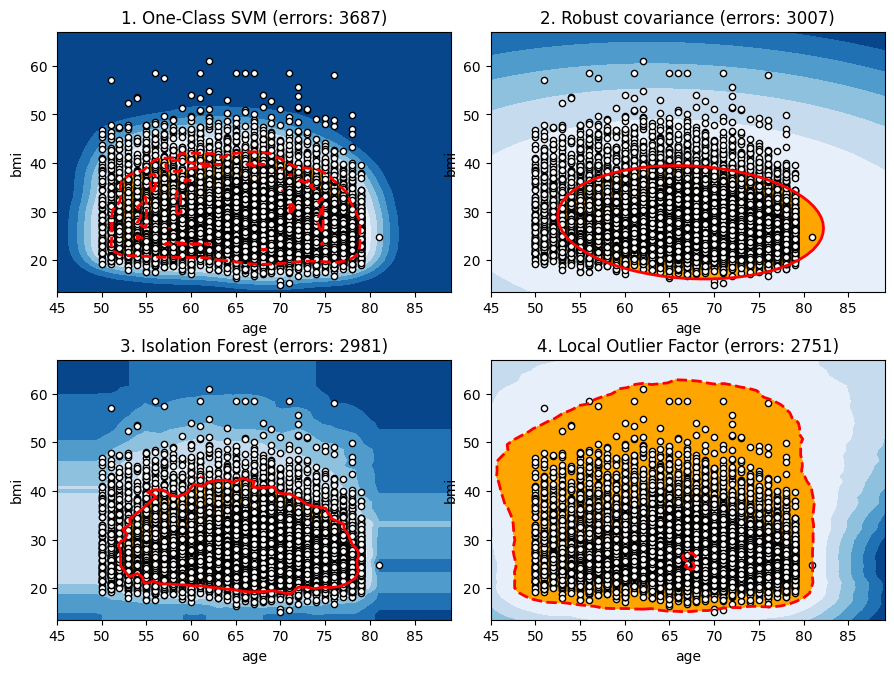

In [ ]:
tt = OutLierDetection(df_update,'age','bmi',.1)

## 3.1 Evaluate Algorithms: Baseline

In [ ]:
# Load libraries
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

### make train-validation and test data sets

In [ ]:
#df.dropna(subset=['baseline_sleepdis','delta_sleep','mi'], inplace=True)
df_update['cvd_binary'].value_counts()

0    4473
1    1359
Name: cvd_binary, dtype: int64

In [ ]:
df_update.shape

(5832, 26)

In [ ]:
X = df_update[df_name[0:25]]
Y = df_update[df_name[25]]
X_train, X_test, y_train, y_test = train_test_split(
    X,Y,
    test_size=0.3,
    random_state=0,
    stratify=Y
)
# train 和 test 分布不平衡的情况会 用到stratify参数，按照x 或者 y 调整平衡分布
# 将stratify=X就是按照X中的比例分配 
# 将stratify=y就是按照y中的比例分配

In [ ]:
sum(y_train == 1)
print("There are {} training samples".format(y_train.shape[0]))
print("There are {} testing samples".format(X_test.shape[0]))

There are 4082 training samples
There are 1750 testing samples


## 3.2 SMOTE for unbalanced data

#### 查看数据分布

In [ ]:
from collections import Counter
# 查看所生成的样本类别分布，查看0和1样本比例
print(Counter(Y))

Counter({0: 4473, 1: 1359})


#### smote算法核心语句

In [ ]:
# 使用imlbearn库中上采样方法中的smote接口
from imblearn.over_sampling import SMOTE
# 定义smote模型
smo = SMOTE(random_state = 42)
X_train_smo, y_train_smo = smo.fit_resample(X_train,y_train)

In [ ]:
print(Counter(y_train_smo))

Counter({0: 3131, 1: 3131})


In [ ]:
X.head(10)

,age,sbp,dbp,bmi,glu,chol,ldl,hdl,tg,insu,tot_cal,baseline_fat,baseline_pro,baseline_cho,baseline_sfa,baseline_mufa,baseline_pufa,baseline_alc,baseline_palm,baseline_n3,hei,baseline_sleepdis,baseline_ces_d,delta_sleep,coffee,time_walk_10min,cvd_his,hypertension_his,cancer_his,SCORE_baseline_sleep_p0.05_0.05,SCORE_inso_all_group
0,59,115.0,80.0,35.62579,265.000000,283.00000,185.000000,68.000000,151.000000,113.000000,2909.92283,81.95551,117.69064,443.34403,31.21059,26.43309,17.67438,0.00634,15.89256,2.01256,77.25781,5.0,0.07820,0.441317,1.0,5.0,0.0,0.0,0.0,567.877,0.000188
1,51,125.0,84.0,41.22847,104.000000,215.00000,149.000000,36.000000,150.000000,70.000000,1524.63584,66.72611,60.70822,155.72613,13.92200,24.03499,23.54255,10.01349,8.64331,2.54322,63.98034,7.0,0.00144,-4.000000,1.0,0.0,0.0,0.0,0.0,557.363,0.000207
2,70,176.0,92.0,22.30924,84.000000,288.00000,203.000000,73.000000,62.000000,52.867359,1228.53449,40.19991,58.67646,160.10975,13.59158,14.54817,8.02075,0.00493,7.44353,0.82732,67.62396,5.0,0.00552,-1.000000,1.0,4.0,0.0,1.0,0.0,545.961,0.000162
3,69,112.0,61.0,32.26933,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,10.40186,0.62071,0.39478,0.66325,0.20647,0.18950,0.18983,0.00000,0.10192,0.01940,33.69145,11.0,0.00173,0.441317,1.0,4.0,0.0,0.0,1.0,544.527,0.000187
4,67,123.0,75.0,32.25674,93.000000,245.00000,157.000000,49.000000,192.000000,6.600000,548.58139,12.48523,11.24794,99.88404,4.25492,4.38228,2.81920,0.00046,2.12112,0.24068,50.62150,4.0,0.00173,1.000000,0.0,0.0,0.0,0.0,0.0,543.672,0.000239
5,54,104.0,69.0,26.87263,105.000000,219.00000,152.500000,50.500000,77.500000,34.200000,2456.97239,109.57551,105.39777,268.58096,40.51814,37.89930,22.66372,0.04528,21.16896,2.34198,56.51048,0.0,0.00144,8.000000,1.0,1.0,0.0,0.0,0.0,559.216,0.000280
6,74,194.0,86.0,28.37994,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,2267.00957,78.13344,111.14352,289.08074,24.27519,30.16302,17.82685,3.27085,13.37497,1.33236,81.89114,3.0,0.02123,0.441317,1.0,4.0,0.0,1.0,0.0,552.656,0.000178
7,70,127.0,71.0,38.01891,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,1069.65164,24.46105,55.08254,147.65314,11.11475,8.12573,3.52683,8.74159,5.47146,0.73413,75.95065,16.0,0.23272,0.441317,0.0,3.0,0.0,1.0,0.0,540.563,0.000149
8,74,128.0,71.0,20.85543,105.500000,291.00000,210.000000,70.000000,58.000000,15.900000,2112.96228,86.07637,75.09277,255.77008,31.81253,32.75094,15.77018,6.50838,16.29174,1.70033,62.18331,7.0,0.00173,1.000000,0.0,3.0,0.0,0.0,0.0,558.601,0.000227
9,72,107.0,66.0,27.10177,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,1188.08682,35.13830,67.38928,151.16586,8.71863,13.77161,9.36556,2.17688,5.27329,1.57331,77.09362,9.0,0.58322,0.441317,1.0,4.0,0.0,0.0,1.0,551.218,0.000227


In [ ]:
Y.head(10)

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: cvd_binary, dtype: int64

In [ ]:
df_update.head(10)

,age,sbp,dbp,bmi,glu,chol,ldl,hdl,tg,insu,tot_cal,baseline_fat,baseline_pro,baseline_cho,baseline_sfa,baseline_mufa,baseline_pufa,baseline_alc,baseline_palm,baseline_n3,hei,baseline_sleepdis,baseline_ces_d,delta_sleep,coffee,time_walk_10min,cvd_his,hypertension_his,cancer_his,SCORE_baseline_sleep_p0.05_0.05,SCORE_inso_all_group,cvd_binary
0,59,115.0,80.0,35.62579,265.000000,283.00000,185.000000,68.000000,151.000000,113.000000,2909.92283,81.95551,117.69064,443.34403,31.21059,26.43309,17.67438,0.00634,15.89256,2.01256,77.25781,5.0,0.07820,0.441317,1.0,5.0,0.0,0.0,0.0,567.877,0.000188,1
1,51,125.0,84.0,41.22847,104.000000,215.00000,149.000000,36.000000,150.000000,70.000000,1524.63584,66.72611,60.70822,155.72613,13.92200,24.03499,23.54255,10.01349,8.64331,2.54322,63.98034,7.0,0.00144,-4.000000,1.0,0.0,0.0,0.0,0.0,557.363,0.000207,0
2,70,176.0,92.0,22.30924,84.000000,288.00000,203.000000,73.000000,62.000000,52.867359,1228.53449,40.19991,58.67646,160.10975,13.59158,14.54817,8.02075,0.00493,7.44353,0.82732,67.62396,5.0,0.00552,-1.000000,1.0,4.0,0.0,1.0,0.0,545.961,0.000162,0
3,69,112.0,61.0,32.26933,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,10.40186,0.62071,0.39478,0.66325,0.20647,0.18950,0.18983,0.00000,0.10192,0.01940,33.69145,11.0,0.00173,0.441317,1.0,4.0,0.0,0.0,1.0,544.527,0.000187,0
4,67,123.0,75.0,32.25674,93.000000,245.00000,157.000000,49.000000,192.000000,6.600000,548.58139,12.48523,11.24794,99.88404,4.25492,4.38228,2.81920,0.00046,2.12112,0.24068,50.62150,4.0,0.00173,1.000000,0.0,0.0,0.0,0.0,0.0,543.672,0.000239,0
5,54,104.0,69.0,26.87263,105.000000,219.00000,152.500000,50.500000,77.500000,34.200000,2456.97239,109.57551,105.39777,268.58096,40.51814,37.89930,22.66372,0.04528,21.16896,2.34198,56.51048,0.0,0.00144,8.000000,1.0,1.0,0.0,0.0,0.0,559.216,0.000280,0
6,74,194.0,86.0,28.37994,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,2267.00957,78.13344,111.14352,289.08074,24.27519,30.16302,17.82685,3.27085,13.37497,1.33236,81.89114,3.0,0.02123,0.441317,1.0,4.0,0.0,1.0,0.0,552.656,0.000178,0
7,70,127.0,71.0,38.01891,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,1069.65164,24.46105,55.08254,147.65314,11.11475,8.12573,3.52683,8.74159,5.47146,0.73413,75.95065,16.0,0.23272,0.441317,0.0,3.0,0.0,1.0,0.0,540.563,0.000149,0
8,74,128.0,71.0,20.85543,105.500000,291.00000,210.000000,70.000000,58.000000,15.900000,2112.96228,86.07637,75.09277,255.77008,31.81253,32.75094,15.77018,6.50838,16.29174,1.70033,62.18331,7.0,0.00173,1.000000,0.0,3.0,0.0,0.0,0.0,558.601,0.000227,0
9,72,107.0,66.0,27.10177,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,1188.08682,35.13830,67.38928,151.16586,8.71863,13.77161,9.36556,2.17688,5.27329,1.57331,77.09362,9.0,0.58322,0.441317,1.0,4.0,0.0,0.0,1.0,551.218,0.000227,0


## 3.3 spot-check algorithms

In [ ]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [ ]:
def BasedLine2(X_train, y_train, models):
  # Test options and evaluation metric
  num_folds = 10
  # score 的类型可以选择"accuracy"，"roc_auc", "f1", "precesion", "recall"
  scoring = "recall"
  results = []
  names = []
  # StratifiedKFold 保证训练集中每一类的比例是相同的,其中参数含义：n_splits为折叠次数,shuffle: 是否在每次分割之前打乱顺序
  # cross_val_score 为交叉验证函数，其中参数含义，cv为每次选择验证折数 
  for name, model in models:
    kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
  return names, results

In [ ]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train_smo, y_train_smo, models)
# 箱式图 为 d最小值、第一四分位数、中位数、第三四分位数和最大值
PlotBoxR().PlotResult(names, results)

LR: 0.602698 (0.041172)
LDA: 0.617077 (0.030125)
KNN: 0.911843 (0.011304)
CART: 0.768763 (0.025007)
NB: 0.662733 (0.035758)
SVM: 0.354805 (0.134078)
AB: 0.719258 (0.025348)
GBM: 0.722133 (0.031207)
RF: 0.793354 (0.032632)
ET: 0.846692 (0.022149)


## 3.4 define dataframe genetating calculator

In [ ]:
def ScoreDataFrame(names, results):
  def floatingDecimals(f_val, dec=3):
    prc = "{:." + str(dec)+"f}"
    return float(prc.format(f_val))
  scores = []
  for r in results:
    scores.append(floatingDecimals(r.mean(),4))
  scoreDataFrame = pd.DataFrame({'Model':names, 'Score':scores})
  return scoreDataFrame

### 3.4.1 基线未做任何校正 各个模型的 accuracy

In [ ]:
## 基线未做任何调整的各个模型的 accuracy
basedLineScore = ScoreDataFrame(names, results)
basedLineScore
# results 为包含cv验证后的 accuracy（取均值)

,Model,Score
0,LR,0.5995
1,LDA,0.6287
2,KNN,0.7177
3,CART,0.7518
4,NB,0.6452
5,SVM,0.5153
6,AB,0.8042
7,GBM,0.8307
8,RF,0.8520
9,ET,0.8892


# 4 Feature Engineering

## 4.1 Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# .append() 将任何对象添加到给定列表
def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'_LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'_LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'_KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'_CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'_NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'_SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'_AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'_GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'_RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'_ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

### 有时scaling 也可提高 tree based model 的预测准确性

## 4.1.2 standard 标准化 Scaling method(第一次校正模型后的accuracy)

---



In [ ]:
## 选择standard标准化的方法，对x进行标准化
models = GetScaledModel('standard')
names,results = BasedLine2(X_train_smo, y_train_smo, models)
PlotBoxR().PlotResult(names, results)


standard_LR: 0.769966 (0.005611)
standard_LDA: 0.769231 (0.008397)
standard_KNN: 0.726604 (0.011028)
standard_CART: 0.646500 (0.020702)
standard_NB: 0.709207 (0.013239)
standard_SVM: 0.768741 (0.002676)
standard_AB: 0.755514 (0.013679)
standard_GBM: 0.758942 (0.010349)
standard_RF: 0.763843 (0.006340)
standard_ET: 0.765311 (0.008120)


,Model,Score,Model,Score
0,LR,0.5995,standard_LR,0.7700
1,LDA,0.6287,standard_LDA,0.7692
2,KNN,0.7177,standard_KNN,0.7266
3,CART,0.7518,standard_CART,0.6465
4,NB,0.6452,standard_NB,0.7092
5,SVM,0.5153,standard_SVM,0.7687
6,AB,0.8042,standard_AB,0.7555
7,GBM,0.8307,standard_GBM,0.7589
8,RF,0.8520,standard_RF,0.7638
9,ET,0.8892,standard_ET,0.7653


### 采用standard校正后 模型 的 accuracy

In [ ]:
scaledScoreStandard = ScoreDataFrame(names, results)
## 经standard标准化之后的 各个模型的结果
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

,Model,Score,Model,Score
0,LR,0.5995,standard_LR,0.7700
1,LDA,0.6287,standard_LDA,0.7692
2,KNN,0.7177,standard_KNN,0.7266
3,CART,0.7518,standard_CART,0.6465
4,NB,0.6452,standard_NB,0.7092
5,SVM,0.5153,standard_SVM,0.7687
6,AB,0.8042,standard_AB,0.7555
7,GBM,0.8307,standard_GBM,0.7589
8,RF,0.8520,standard_RF,0.7638
9,ET,0.8892,standard_ET,0.7653


## 4.1.3 MinMax标准化方法(第一次模型校正后的accuracy)

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_smo, y_train_smo, models)
PlotBoxR().PlotResult(names, results)


minmax_LR: 0.631270 (0.018884)
minmax_LDA: 0.628715 (0.016893)
minmax_KNN: 0.759505 (0.021654)
minmax_CART: 0.750559 (0.015073)
minmax_NB: 0.649158 (0.023338)
minmax_SVM: 0.753276 (0.015159)
minmax_AB: 0.805012 (0.015064)
minmax_GBM: 0.829447 (0.012118)
minmax_RF: 0.849889 (0.016982)
minmax_ET: 0.889493 (0.008164)


### 采用minmax 矫正后 模型的accuracy

In [ ]:
scaledScoreMinMax = ScoreDataFrame(names, results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                           scaledScoreMinMax], axis = 1)
compareModels

,Model,Score,Model,Score,Model,Score
0,LR,0.5995,standard_LR,0.7700,minmax_LR,0.7675
1,LDA,0.6287,standard_LDA,0.7692,minmax_LDA,0.7692
2,KNN,0.7177,standard_KNN,0.7266,minmax_KNN,0.7357
3,CART,0.7518,standard_CART,0.6465,minmax_CART,0.6605
4,NB,0.6452,standard_NB,0.7092,minmax_NB,0.7092
5,SVM,0.5153,standard_SVM,0.7687,minmax_SVM,0.7663
6,AB,0.8042,standard_AB,0.7555,minmax_AB,0.7555
7,GBM,0.8307,standard_GBM,0.7589,minmax_GBM,0.7589
8,RF,0.8520,standard_RF,0.7638,minmax_RF,0.7651
9,ET,0.8892,standard_ET,0.7653,minmax_ET,0.7663


## 4.2 Remove Outliers

### Let's remove outliers and see how it effects on the prediction

In [ ]:
df_t = df_update.copy()
df_t_name = df_t.columns

In [ ]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):
    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]
   
    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out


In [ ]:
df_t.head(10)

,age,sbp,dbp,bmi,glu,chol,ldl,hdl,tg,insu,tot_cal,baseline_fat,baseline_pro,baseline_cho,baseline_sfa,baseline_mufa,baseline_pufa,baseline_alc,baseline_palm,baseline_n3,hei,baseline_sleepdis,baseline_ces_d,delta_sleep,coffee,time_walk_10min,cvd_his,hypertension_his,cancer_his,SCORE_baseline_sleep_p0.05_0.05,SCORE_inso_all_group,cvd_binary
0,59,115.0,80.0,35.62579,265.000000,283.00000,185.000000,68.000000,151.000000,113.000000,2909.92283,81.95551,117.69064,443.34403,31.21059,26.43309,17.67438,0.00634,15.89256,2.01256,77.25781,5.0,0.07820,0.441317,1.0,5.0,0.0,0.0,0.0,567.877,0.000188,1
1,51,125.0,84.0,41.22847,104.000000,215.00000,149.000000,36.000000,150.000000,70.000000,1524.63584,66.72611,60.70822,155.72613,13.92200,24.03499,23.54255,10.01349,8.64331,2.54322,63.98034,7.0,0.00144,-4.000000,1.0,0.0,0.0,0.0,0.0,557.363,0.000207,0
2,70,176.0,92.0,22.30924,84.000000,288.00000,203.000000,73.000000,62.000000,52.867359,1228.53449,40.19991,58.67646,160.10975,13.59158,14.54817,8.02075,0.00493,7.44353,0.82732,67.62396,5.0,0.00552,-1.000000,1.0,4.0,0.0,1.0,0.0,545.961,0.000162,0
3,69,112.0,61.0,32.26933,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,10.40186,0.62071,0.39478,0.66325,0.20647,0.18950,0.18983,0.00000,0.10192,0.01940,33.69145,11.0,0.00173,0.441317,1.0,4.0,0.0,0.0,1.0,544.527,0.000187,0
4,67,123.0,75.0,32.25674,93.000000,245.00000,157.000000,49.000000,192.000000,6.600000,548.58139,12.48523,11.24794,99.88404,4.25492,4.38228,2.81920,0.00046,2.12112,0.24068,50.62150,4.0,0.00173,1.000000,0.0,0.0,0.0,0.0,0.0,543.672,0.000239,0
5,54,104.0,69.0,26.87263,105.000000,219.00000,152.500000,50.500000,77.500000,34.200000,2456.97239,109.57551,105.39777,268.58096,40.51814,37.89930,22.66372,0.04528,21.16896,2.34198,56.51048,0.0,0.00144,8.000000,1.0,1.0,0.0,0.0,0.0,559.216,0.000280,0
6,74,194.0,86.0,28.37994,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,2267.00957,78.13344,111.14352,289.08074,24.27519,30.16302,17.82685,3.27085,13.37497,1.33236,81.89114,3.0,0.02123,0.441317,1.0,4.0,0.0,1.0,0.0,552.656,0.000178,0
7,70,127.0,71.0,38.01891,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,1069.65164,24.46105,55.08254,147.65314,11.11475,8.12573,3.52683,8.74159,5.47146,0.73413,75.95065,16.0,0.23272,0.441317,0.0,3.0,0.0,1.0,0.0,540.563,0.000149,0
8,74,128.0,71.0,20.85543,105.500000,291.00000,210.000000,70.000000,58.000000,15.900000,2112.96228,86.07637,75.09277,255.77008,31.81253,32.75094,15.77018,6.50838,16.29174,1.70033,62.18331,7.0,0.00173,1.000000,0.0,3.0,0.0,0.0,0.0,558.601,0.000227,0
9,72,107.0,66.0,27.10177,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,1188.08682,35.13830,67.38928,151.16586,8.71863,13.77161,9.36556,2.17688,5.27329,1.57331,77.09362,9.0,0.58322,0.441317,1.0,4.0,0.0,0.0,1.0,551.218,0.000227,0


In [ ]:
df_t['cvd_binary'].value_counts()

0    12729
1     3859
Name: cvd_binary, dtype: int64

### Feature 0

In [ ]:
feature_number = 0
OutLiersBox(df_t,df_t_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_t, df_t_name[feature_number], True)
OutLiersBox(df_clean, df_name[feature_number])

### Feature 1

In [ ]:
feature_number = 1
OutLiersBox(df_t,df_t_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_t_name[feature_number],True)
OutLiersBox(df_clean,df_t_name[feature_number])

### Feature 2

In [ ]:
feature_number = 2
OutLiersBox(df_t,df_t_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 3

In [ ]:
feature_number = 3
OutLiersBox(df_t,df_t_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 4

In [ ]:
feature_number = 4
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[4],True)
OutLiersBox(df_clean,df_name[4])

### Feature 5

In [ ]:
feature_number = 5
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 6

In [ ]:
feature_number = 6
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 7

In [ ]:
feature_number = 7
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 8

In [ ]:
feature_number = 8
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 9

In [ ]:
feature_number = 9
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Cleaning Report

In [ ]:
print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df_t.shape[0],df_clean.shape[0],
                                                              df_t.shape[0]-df_clean.shape[0],
                                                        (df_t.shape[0]-df_clean.shape[0])/df_t.shape[0]*100))

df shape: 5832, new df shape: 5752, we lost 80 rows, 1.3717421124828533% of our data


In [ ]:
df_clean['cvd_binary'].value_counts()

0    12729
1     3859
Name: cvd_binary, dtype: int64

### double-check and compare the outliers between before and after removing the outliers

```
# This is formatted as code
```



In [ ]:
tt = OutLierDetection(df,'age','PC1',.1)

In [ ]:
tt_t = OutLierDetection(df_clean,'age','PC1',.1)

### Comparing the accuracy of models after cleaning

In [ ]:
df_clean.shape

(16588, 32)

In [ ]:
df_clean_name = df_clean.columns
X_c =  df_clean[df_clean_name[0:31]]
Y_c = df_clean[df_clean_name[31]]
X_train_c, X_test_c, y_train_c, y_test_c =train_test_split(X_c,Y_c,
                                                   test_size=0.3,
                                                   random_state=0,
                                                   stratify=df_clean['cvd_binary'])

In [ ]:
X_c.head(10)

,age,sbp,dbp,bmi,glu,chol,ldl,hdl,tg,insu,tot_cal,baseline_fat,baseline_pro,baseline_cho,baseline_sfa,baseline_mufa,baseline_pufa,baseline_alc,baseline_palm,baseline_n3,hei,baseline_sleepdis,baseline_ces_d,delta_sleep,coffee,time_walk_10min,cvd_his,hypertension_his,cancer_his,SCORE_baseline_sleep_p0.05_0.05,SCORE_inso_all_group
0,59,115.0,80.0,35.62579,265.000000,283.00000,185.000000,68.000000,151.000000,113.000000,2909.92283,81.95551,117.69064,443.34403,31.21059,26.43309,17.67438,0.00634,15.89256,2.01256,77.25781,5.0,0.07820,0.441317,1.0,5.0,0.0,0.0,0.0,567.877,0.000188
1,51,125.0,84.0,41.22847,104.000000,215.00000,149.000000,36.000000,150.000000,70.000000,1524.63584,66.72611,60.70822,155.72613,13.92200,24.03499,23.54255,10.01349,8.64331,2.54322,63.98034,7.0,0.00144,-4.000000,1.0,0.0,0.0,0.0,0.0,557.363,0.000207
2,70,176.0,92.0,22.30924,84.000000,288.00000,203.000000,73.000000,62.000000,52.867359,1228.53449,40.19991,58.67646,160.10975,13.59158,14.54817,8.02075,0.00493,7.44353,0.82732,67.62396,5.0,0.00552,-1.000000,1.0,4.0,0.0,1.0,0.0,545.961,0.000162
3,69,112.0,61.0,32.26933,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,10.40186,0.62071,0.39478,0.66325,0.20647,0.18950,0.18983,0.00000,0.10192,0.01940,33.69145,11.0,0.00173,0.441317,1.0,4.0,0.0,0.0,1.0,544.527,0.000187
4,67,123.0,75.0,32.25674,93.000000,245.00000,157.000000,49.000000,192.000000,6.600000,548.58139,12.48523,11.24794,99.88404,4.25492,4.38228,2.81920,0.00046,2.12112,0.24068,50.62150,4.0,0.00173,1.000000,0.0,0.0,0.0,0.0,0.0,543.672,0.000239
5,54,104.0,69.0,26.87263,105.000000,219.00000,152.500000,50.500000,77.500000,34.200000,2456.97239,109.57551,105.39777,268.58096,40.51814,37.89930,22.66372,0.04528,21.16896,2.34198,56.51048,0.0,0.00144,8.000000,1.0,1.0,0.0,0.0,0.0,559.216,0.000280
6,74,194.0,86.0,28.37994,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,2267.00957,78.13344,111.14352,289.08074,24.27519,30.16302,17.82685,3.27085,13.37497,1.33236,81.89114,3.0,0.02123,0.441317,1.0,4.0,0.0,1.0,0.0,552.656,0.000178
7,70,127.0,71.0,38.01891,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,1069.65164,24.46105,55.08254,147.65314,11.11475,8.12573,3.52683,8.74159,5.47146,0.73413,75.95065,16.0,0.23272,0.441317,0.0,3.0,0.0,1.0,0.0,540.563,0.000149
8,74,128.0,71.0,20.85543,105.500000,291.00000,210.000000,70.000000,58.000000,15.900000,2112.96228,86.07637,75.09277,255.77008,31.81253,32.75094,15.77018,6.50838,16.29174,1.70033,62.18331,7.0,0.00173,1.000000,0.0,3.0,0.0,0.0,0.0,558.601,0.000227
9,72,107.0,66.0,27.10177,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,1188.08682,35.13830,67.38928,151.16586,8.71863,13.77161,9.36556,2.17688,5.27329,1.57331,77.09362,9.0,0.58322,0.441317,1.0,4.0,0.0,0.0,1.0,551.218,0.000227


In [ ]:
X_train_c.head(10)

,age,sbp,dbp,bmi,glu,chol,ldl,hdl,tg,insu,tot_cal,baseline_fat,baseline_pro,baseline_cho,baseline_sfa,baseline_mufa,baseline_pufa,baseline_alc,baseline_palm,baseline_n3,hei,baseline_sleepdis,baseline_ces_d,delta_sleep,coffee,time_walk_10min,cvd_his,hypertension_his,cancer_his,SCORE_baseline_sleep_p0.05_0.05,SCORE_inso_all_group
11558,59,145.0,95.0,35.67649,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,928.40027,33.73242,53.59285,107.00766,12.55346,13.14584,4.79169,0.00000,6.97991,0.69117,71.45522,5.000000,0.00064,10.000000,0.0,4.0,0.0,0.0,0.0,551.554,0.000160
9510,69,112.0,69.0,26.70931,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,1190.58256,52.65685,40.75282,126.71293,19.38782,19.20724,9.82189,10.75839,9.79559,1.02857,64.08574,4.000000,0.00144,0.441317,0.0,1.0,0.0,0.0,0.0,529.630,0.000279
10863,70,128.0,82.0,28.80506,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,629.31624,15.36384,22.76862,103.40618,5.22646,5.28975,3.30918,0.99852,2.92227,0.45222,71.72833,14.000000,0.00554,0.441317,1.0,0.0,0.0,1.0,0.0,564.690,0.000209
16017,67,150.0,73.0,24.73702,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,1111.44289,42.65157,48.10053,117.20124,12.71276,16.00947,10.46962,12.44291,7.34583,1.28073,68.73373,6.871839,0.00173,0.441317,1.0,2.0,0.0,1.0,0.0,557.985,0.000212
6030,69,149.0,90.0,28.40058,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,2417.72304,106.82950,140.14810,226.32195,44.16623,41.30562,15.12239,0.01033,21.94072,1.90284,44.48678,6.000000,0.00173,5.000000,1.0,2.0,0.0,1.0,0.0,548.897,0.000185
4818,67,151.0,86.0,39.26279,100.000000,215.00000,140.000000,50.000000,127.000000,44.150000,3635.00736,171.07664,122.48967,414.04958,68.42968,60.90082,30.36982,0.13045,34.48390,2.92699,47.86126,0.000000,0.00144,1.000000,1.0,3.0,0.0,1.0,0.0,563.260,0.000242
10763,73,150.0,80.0,30.52388,107.000000,275.00000,187.000000,50.000000,193.000000,52.867359,1312.56923,29.36778,48.99483,223.75008,9.78473,10.69721,6.28571,1.77171,5.33544,1.02254,80.47189,13.000000,0.00131,-8.000000,0.0,4.0,1.0,1.0,0.0,536.555,0.000227
15610,69,135.0,85.0,24.28098,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,1055.45781,35.94007,45.53716,130.14386,10.40993,14.08460,8.99763,7.27594,5.63828,1.22128,81.01744,3.000000,0.00144,0.441317,1.0,3.0,0.0,1.0,0.0,552.402,0.000202
13300,69,126.0,76.0,35.25322,122.000000,253.00000,184.000000,52.000000,87.000000,36.000000,2065.45323,84.03266,80.96607,258.46154,26.79860,31.48535,19.89159,0.02062,14.57634,1.94475,77.15379,15.000000,0.00111,-2.000000,0.0,0.0,0.0,0.0,0.0,563.781,0.000181
13048,68,131.0,74.0,27.30119,102.928474,234.47707,152.144631,52.554994,150.308914,52.867359,1392.95799,42.58577,71.41482,183.51171,15.64339,15.39415,7.41876,2.35313,8.64472,1.04409,72.75193,7.000000,0.00131,0.441317,1.0,2.0,0.0,0.0,0.0,530.469,0.000195


In [ ]:
y_train_c.head(10)

11558    0
9510     0
10863    1
16017    0
6030     0
4818     0
10763    0
15610    0
13300    1
13048    0
Name: cvd_binary, dtype: int64

In [ ]:
Y_c.head(10)

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: cvd_binary, dtype: int64

### 4.2.1 perform all models by using clean dataset deleting outliers

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_c, y_train_c,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_c = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c], axis=1)
compareModels

minmax_LR: 0.774868 (0.004412)
minmax_LDA: 0.776849 (0.004978)
minmax_KNN: 0.742228 (0.011844)
minmax_CART: 0.674619 (0.012331)
minmax_NB: 0.748169 (0.008247)
minmax_SVM: 0.770648 (0.003172)
minmax_AB: 0.776074 (0.006957)
minmax_GBM: 0.778830 (0.006338)
minmax_RF: 0.778571 (0.005585)
minmax_ET: 0.776246 (0.005413)


,Model,Score,Model,Score,Model,Score,Model,Score
0,LR,0.7762,standard_LR,0.7768,minmax_LR,0.7749,minmax_LR,0.7749
1,LDA,0.7768,standard_LDA,0.7768,minmax_LDA,0.7768,minmax_LDA,0.7768
2,KNN,0.7438,standard_KNN,0.7489,minmax_KNN,0.7422,minmax_KNN,0.7422
3,CART,0.6714,standard_CART,0.6728,minmax_CART,0.6743,minmax_CART,0.6746
4,NB,0.7486,standard_NB,0.7482,minmax_NB,0.7482,minmax_NB,0.7482
5,SVM,0.7674,standard_SVM,0.7774,minmax_SVM,0.7706,minmax_SVM,0.7706
6,AB,0.7757,standard_AB,0.7761,minmax_AB,0.7761,minmax_AB,0.7761
7,GBM,0.7799,standard_GBM,0.7791,minmax_GBM,0.7793,minmax_GBM,0.7788
8,RF,0.7788,standard_RF,0.7767,minmax_RF,0.7762,minmax_RF,0.7786
9,ET,0.7749,standard_ET,0.7737,minmax_ET,0.7745,minmax_ET,0.7762


## 4.3 Feature Selection

### 4.3.1 Corrolation
#### we have to drop the one that has more corrolation with other features

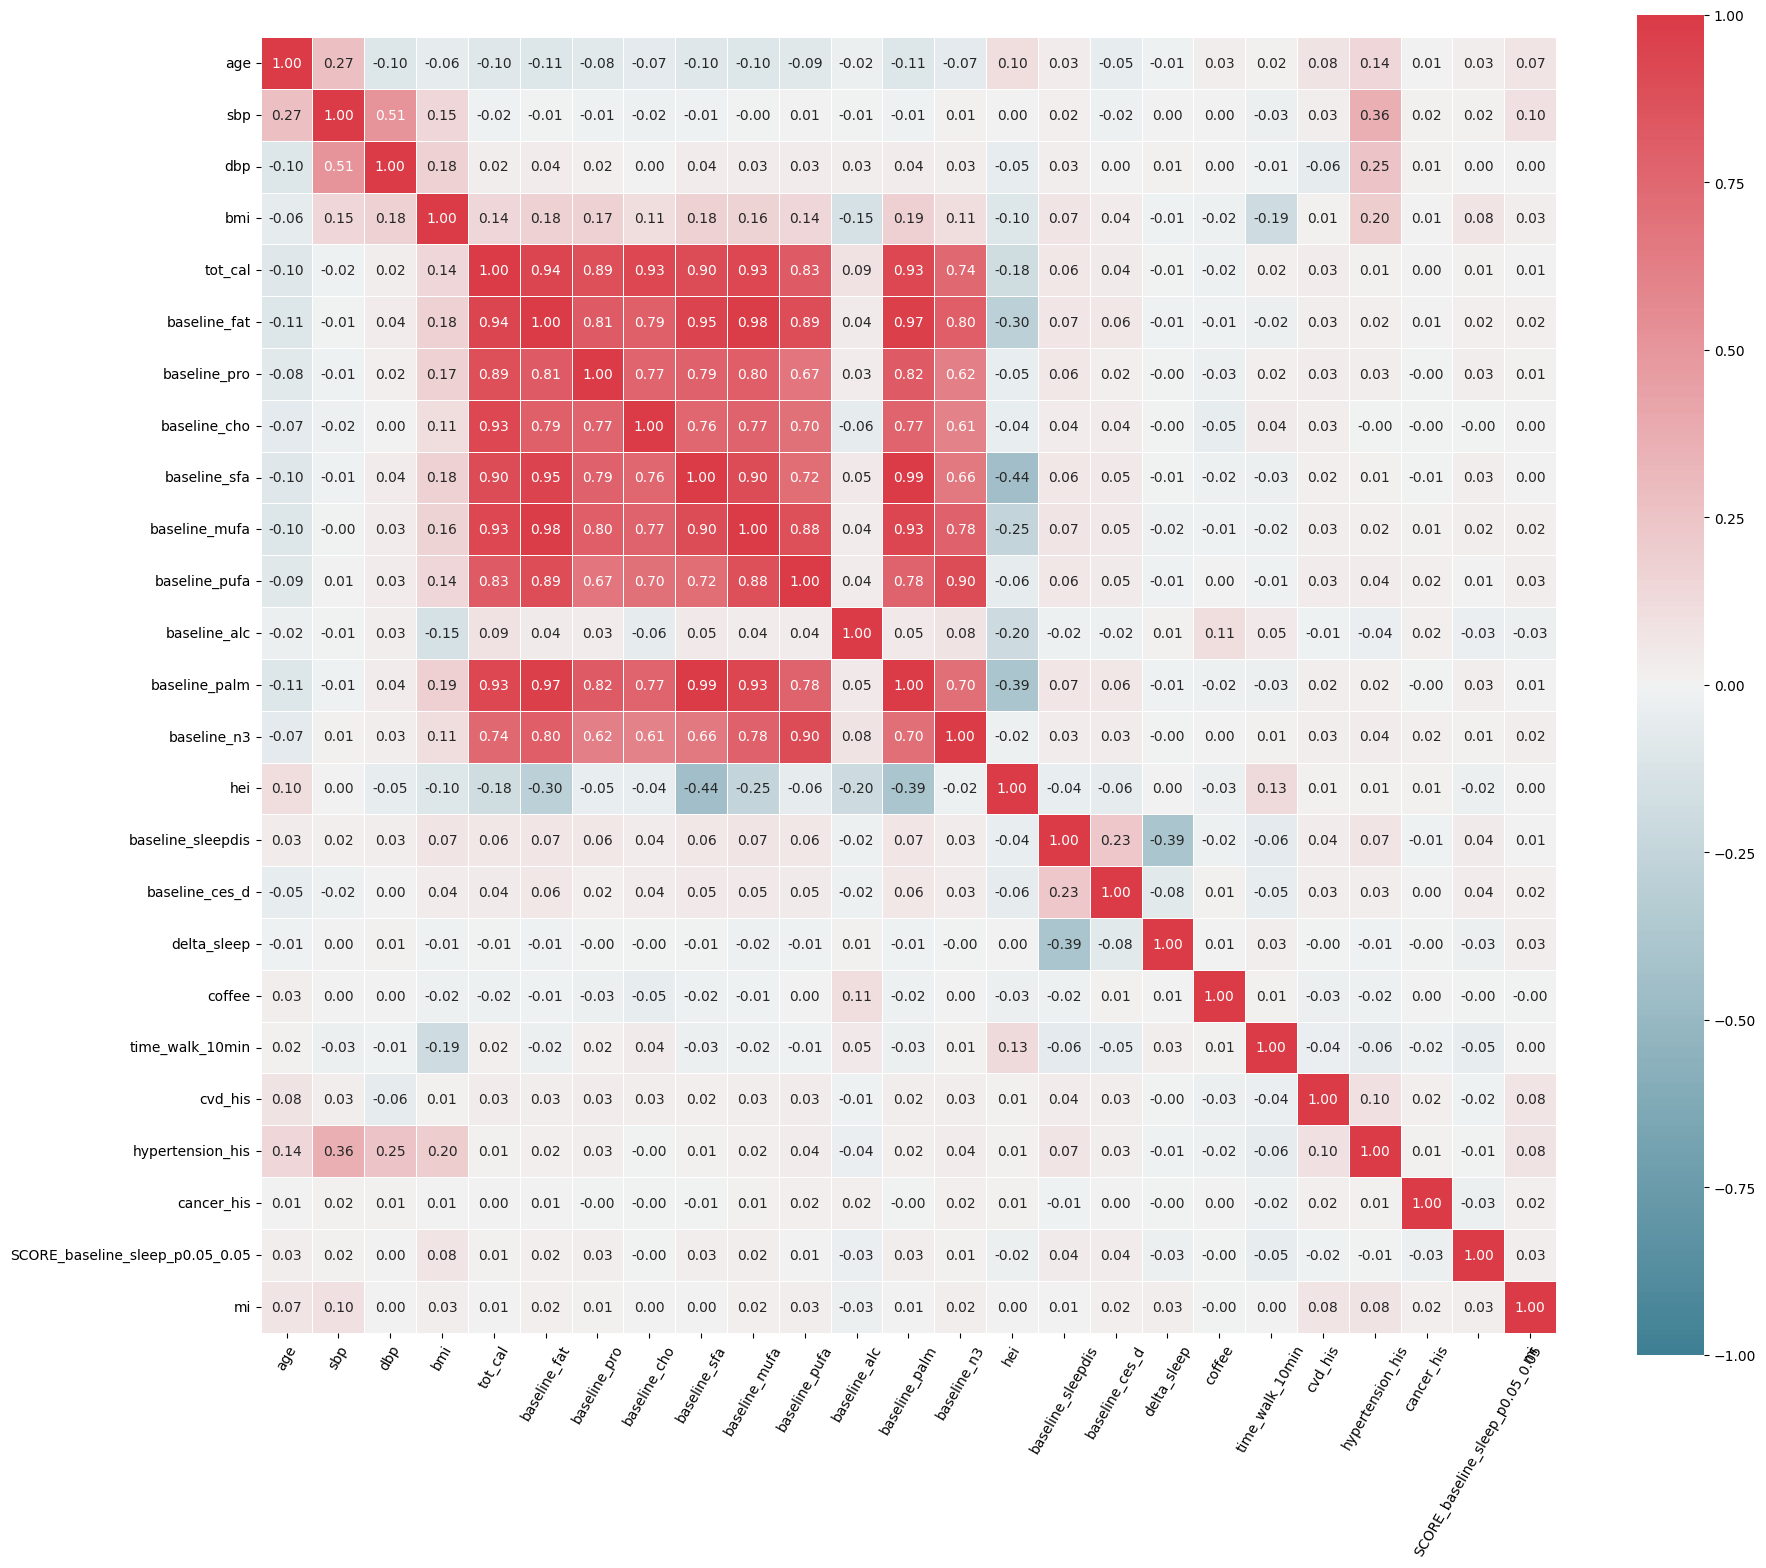

In [ ]:
def HeatMap(df, x=True):
  correlations = df.corr()
  ## creat color map ranging between two colors
  ## diverging_palette()为创建两种颜色过渡色板
  cmap = sns.diverging_palette(220, 10,as_cmap=True)
  fig, ax = plt.subplots(figsize=(19,19))
  ## heatmap中参数: vmin和vmax定义图卡颜色，用于锚定颜色图的值
  # cmap 颜色映射名称或对象; fmt 添加注释时要使用的字符串格式化代码
  fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, vmin=-1.0,
                    fmt='.2f',square=True,linewidths=.5, 
                    annot=x, cbar_kws={'shrink': .75})
  fig.set_xticklabels(fig.get_xticklabels(), rotation = 60, fontsize = 10)
  fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
  plt.tight_layout()
  plt.show()

HeatMap(df_clean,x=True)

### 4.3.2 Feature Importance

In [ ]:
## ExtraTreesClassifier 它将森林中收集的多个去相关决策树的结果聚集起来输出分类结果
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=SEED)

clf.fit(X_train_c, y_train_c)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5


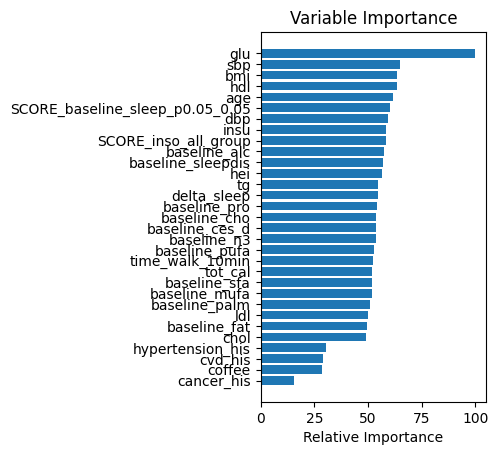

In [ ]:
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_clean.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### 4.3.3 select important features

In [ ]:
df_feature_imp=df_clean[['sbp','SCORE_baseline_sleep_p0.05_0.05','delta_sleep','age','baseline_ces_d','dbp','hei','bmi','baseline_alc','baseline_sleepdis',
                         'baseline_cho','tot_cal','time_walk_10min','cvd_his','coffee','hypertension_his','mi']]

In [ ]:
df_feature_imp_name = df_feature_imp.columns

In [ ]:
X_im =  df_feature_imp[df_feature_imp_name[0:df_feature_imp.shape[1]-1]]
Y_im = df_feature_imp[df_feature_imp_name[df_feature_imp.shape[1]-1]]
X_train_im, X_test_im, y_train_im, y_test_im =train_test_split(X_im,Y_im,
                                                   test_size=0.3,
                                                   random_state=0,
                                                   stratify=df_feature_imp['mi'])

In [ ]:
X_train_im.head()

,sbp,SCORE_baseline_sleep_p0.05_0.05,delta_sleep,age,baseline_ces_d,dbp,hei,bmi,baseline_alc,baseline_sleepdis,baseline_cho,tot_cal,time_walk_10min,cvd_his,coffee,hypertension_his
93,122.0,559.337,0.634052,69,0.04899,74.0,44.13708,26.01134,16.45891,14.0,159.34609,1626.74898,1.0,1.000000,1.0,0.0
3309,134.0,528.650,-2.000000,62,0.00507,68.0,59.34715,24.68698,0.14743,3.0,178.49966,1402.10651,4.0,0.000000,1.0,0.0
791,135.0,552.314,0.634052,67,0.00144,81.0,66.27162,31.69879,0.78340,6.0,195.33402,1984.36866,3.0,0.000000,0.0,0.0
2838,159.0,565.936,-5.000000,67,0.00383,61.0,75.58626,29.22964,7.34947,6.0,195.69896,1572.49283,4.0,1.000000,1.0,1.0
1453,155.0,571.222,1.000000,61,0.42214,89.0,59.95999,40.66208,2.69923,8.0,395.22391,4303.14865,3.0,0.175374,1.0,1.0


In [ ]:
y_train_im.value_counts()

0    3752
1     274
Name: mi, dtype: int64

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_im, y_train_im,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_im = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c,
                          scaledScoreMinMax_im], axis=1)
compareModels

#### 4.3.4 Calculate confusion matrix with random forest model

Confusion matrix: 
 [[1219  123]
 [ 348   60]]
Classfication report: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84      1342
           1       0.33      0.15      0.20       408

    accuracy                           0.73      1750
   macro avg       0.55      0.53      0.52      1750
weighted avg       0.67      0.73      0.69      1750



Text(46.25, 0.5, 'true')

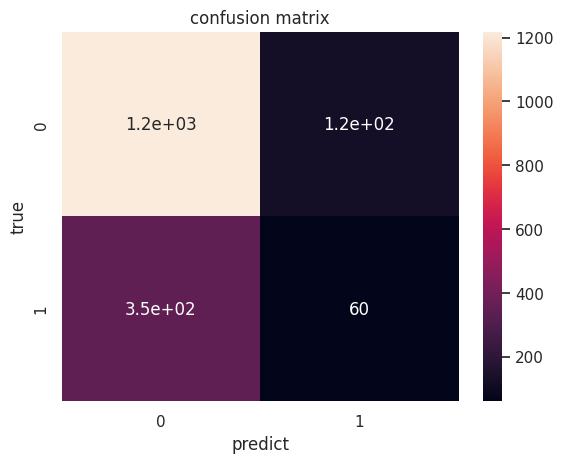

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
rf = RandomForestClassifier(random_state = 4)
rf.fit(X_train_smo, y_train_smo)
y_pred_smo = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_smo)
print('Confusion matrix: \n', cm )
print('Classfication report: \n', classification_report(y_test, y_pred_smo))
# 绘制 confusin matrix 的热力图
sns.set()
f, ax = plt.subplots()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_title('confusion matrix')
ax.set_xlabel('predict')
ax.set_ylabel('true')

In [ ]:
y_pred_smo

array([0, 0, 0, ..., 0, 0, 0])

#### 4.3.5 Generating AUC & ROC plot

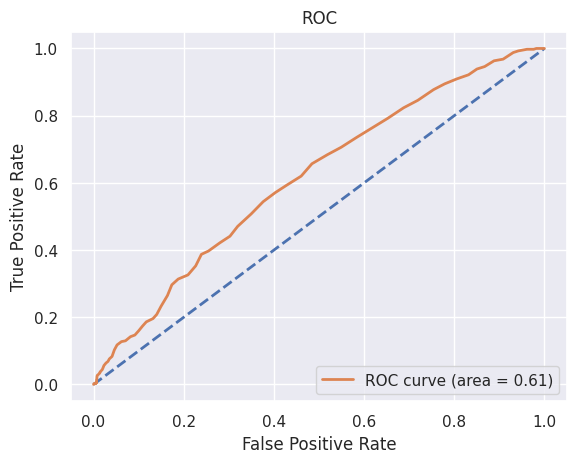

In [ ]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
y_pred_prob_smo = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_smo)
auc = metrics.auc(fpr, tpr)
# plot ROC vurve
plt.figure()
lw = 2
plt.plot([0,1],[0,1], lw = lw, linestyle = '--')
plt.plot(fpr, tpr, lw = lw, label = 'ROC curve (area = %0.2f)' % auc)
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc ="lower right")
plt.show()

#### 4.3.6 Scaled important features

In [ ]:
df_unscaled = df_clean[['sbp','SCORE_baseline_sleep_p0.05_0.05','delta_sleep','age','baseline_ces_d','dbp','hei','bmi','baseline_alc','baseline_sleepdis',
                         'baseline_cho','tot_cal','time_walk_10min','cvd_his','coffee','hypertension_his','mi']]
df_imp_scaled_name = df_unscaled.columns

In [ ]:
df_unscaled.shape

(5752, 17)

In [ ]:
df_imp_scaled = MinMaxScaler().fit_transform(df_unscaled)
X =  df_imp_scaled[:,0:16]
Y =  df_imp_scaled[:,16]
X_train_sc, X_test_sc, y_train_sc, y_test_sc =train_test_split(X,Y,
                                                   test_size=0.3,
                                                   random_state=0,
                                                   stratify=df_imp_scaled[:,16])

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [ ]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

## 4.4 Calculate SHAP values

In [ ]:
## install shap
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 9.3 MB/s eta 0:00:00


In [ ]:
import xgboost
import shap
shap.initjs()

In [ ]:
# train xgb model
xgb_model = xgboost.train({'learning_rate':0.01}, xgboost.DMatrix(X, label = Y), 100)

### 4.4.1 explainer

In [ ]:
# Explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

### 4.4.2 local interper 

In [ ]:
# 单个prediction的解释
# 可视化第一个prediction 的解释
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [ ]:
# 多个预测的解释
shap.force_plot(explainer.expected_value, shap_values, X)

### 4.4.3 Global Interper

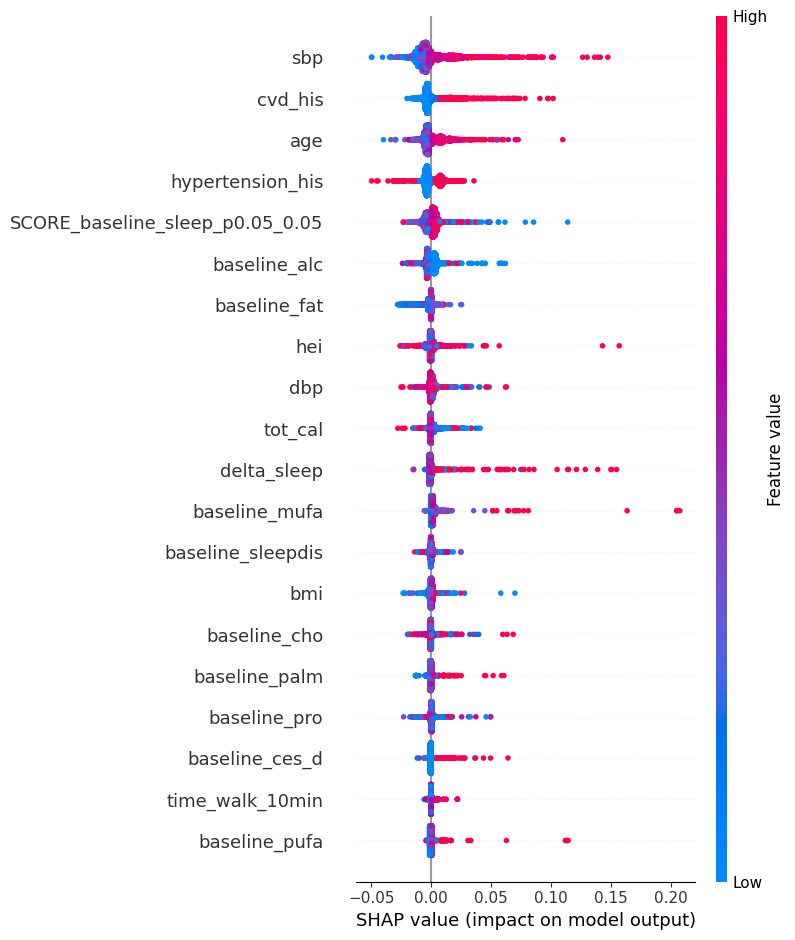

In [ ]:
# summary plot 为每个样本绘制其每个特征的shap值，可更好的解释整体模型，并允许发现异常值
shap.summary_plot(shap_values, X)

### 4.4.4 Feature Important

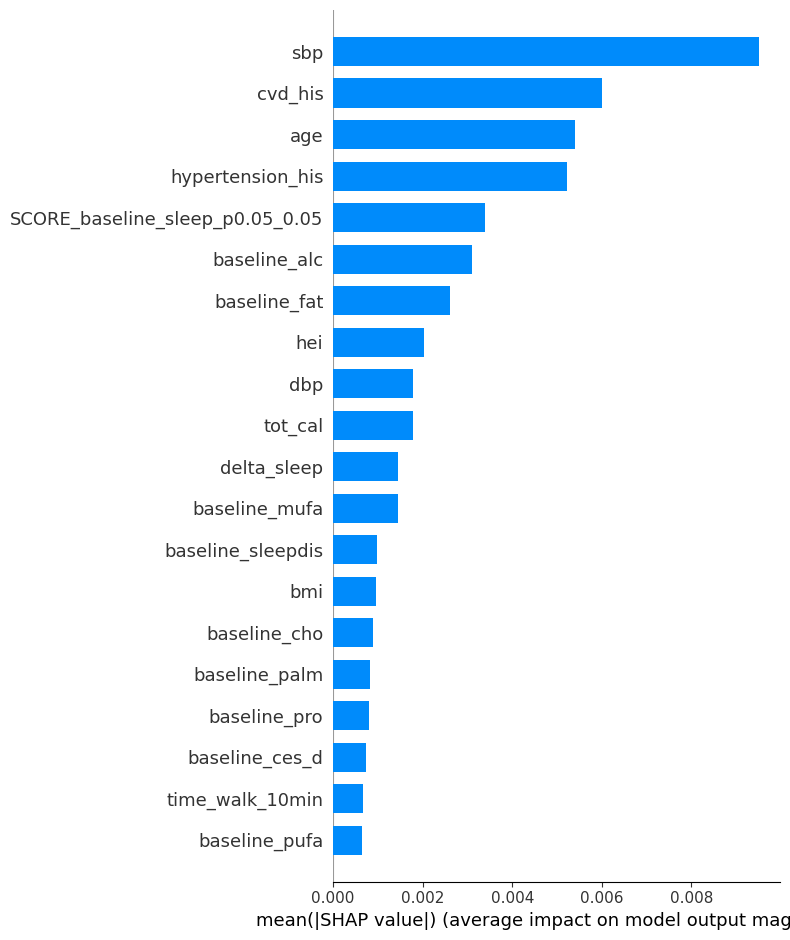

In [ ]:
shap.summary_plot(shap_values,X, plot_type="bar")

## 5 Hyperparameters estimate by using gridsearch method

### 5.1 Logistic Regression

In [ ]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
LR_RandSearch = RandomSearch(X_train_sc,y_train_sc,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_sc)

Best: 0.931943 using {'C': 3.730229437354635, 'penalty': 'l2'}


In [ ]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [ ]:
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_LR).mean(),7))

prediction on test set is: 0.9322132


### 5.2 knn

In [ ]:
# n_neighbors: Number of neighbors to use by default for k_neighbors queries
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

In [ ]:
KNN_GridSearch = GridSearch(X_train_sc,y_train_sc,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_KNN).mean(),7))

Best: 0.931944 using {'n_neighbors': 6}
prediction on test set is: 0.9322132


### 5.3 svc

In [ ]:
# C: The Penalty parameter C of the error term.
# Kernel: Kernel type could be linear, poly, rbf or sigmoid.
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [ ]:
SVC_GridSearch = GridSearch(X_train_sc,y_train_sc,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_SVC).mean(),7))

Best: 0.931943 using {'C': 0.1, 'kernel': 'linear'}
prediction on test set is: 0.9322132


### 5.4 Decision Tree

In [ ]:
# max_depth: Maximum depth of the tree (double).
# row_subsample: Proportion of observations to consider (double).
# max_features: Proportion of columns (features) to consider in each level (double).

from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

In [ ]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [ ]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train_sc,y_train_sc,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_CART).mean(),7))

Best: 0.932191 using {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1}
prediction on test set is: 0.9310545


### 5.5 AdaBoostClassifier

In [ ]:
# learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate.
# n_estimators: Number of trees to build.
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [ ]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_train_sc,y_train_sc,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_Ad).mean(),7))

Best: 0.931943 using {'learning_rate': 0.01, 'n_estimators': 50}
prediction on test set is: 0.9322132


### 5.6 GradientBoosting

In [ ]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [ ]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train_sc,y_train_sc,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_GB).mean(),7))

Best: 0.931943 using {'learning_rate': 0.01, 'n_estimators': 50}
prediction on test set is: 0.9322132


## 6 Ensemble Methods

### 6.1 Voting Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
param = {'C': 3.730229437354635, 'penalty': 'l2'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 6}
model2 = KNeighborsClassifier(**param)

param = {'C': 0.1, 'kernel': 'linear'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 50}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 50}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

model8 = RandomForestClassifier()

model9 = ExtraTreesClassifier()

In [ ]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9)]

In [ ]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=10, random_state=SEED, shuffle=True)
ensemble = VotingClassifier(estimators)
## cross_val_score 为交叉验证函数，其中参数含义，cv为每次选择验证折数 
results = cross_val_score(ensemble, X_train_sc, y_train_sc, cv=kfold, scoring = "accuracy")
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train_sc,y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())

Accuracy on train:  0.9319432613606905
Accuracy on test: 0.9322132097334879


### Beyond Voting

In [ ]:
def get_models():
    """Generate a library of base learners."""
    param = {'C': 3.730229437354635, 'penalty': 'l2'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 6}
    model2 = KNeighborsClassifier(**param)

    param = {'C': 0.1, 'kernel': 'linear', 'probability':True}
    model3 = SVC(**param)

    param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1}
    model4 = DecisionTreeClassifier(**param)

    param = {'learning_rate': 0.01, 'n_estimators': 50}
    model5 = AdaBoostClassifier(**param)

    param = {'learning_rate': 0.01, 'n_estimators': 50}
    model6 = GradientBoostingClassifier(**param)

    model7 = GaussianNB()

    model8 = RandomForestClassifier()

    model9 = ExtraTreesClassifier()

    models = {'LR':model1, 'KNN':model2, 'SVC':model3,
              'DT':model4, 'ADa':model5, 'GB':model6,
              'NB':model7, 'RF':model8,  'ET':model9
              }

    return models

## 6.2. Error Corrolation

In [ ]:
def train_predict(model_list,xtrain, xtest, ytrain, ytest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [ ]:
models = get_models()
P = train_predict(models,X_train_sc,X_test_sc,y_train_sc,y_test_sc)

Fitting models.
LR... done
KNN... done
SVC... done
DT... done
ADa... done
GB... done
NB... done
RF... done
ET... done
Done.



In [ ]:
!pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 8.7 MB/s eta 0:00:00


[MLENS] backend: threading


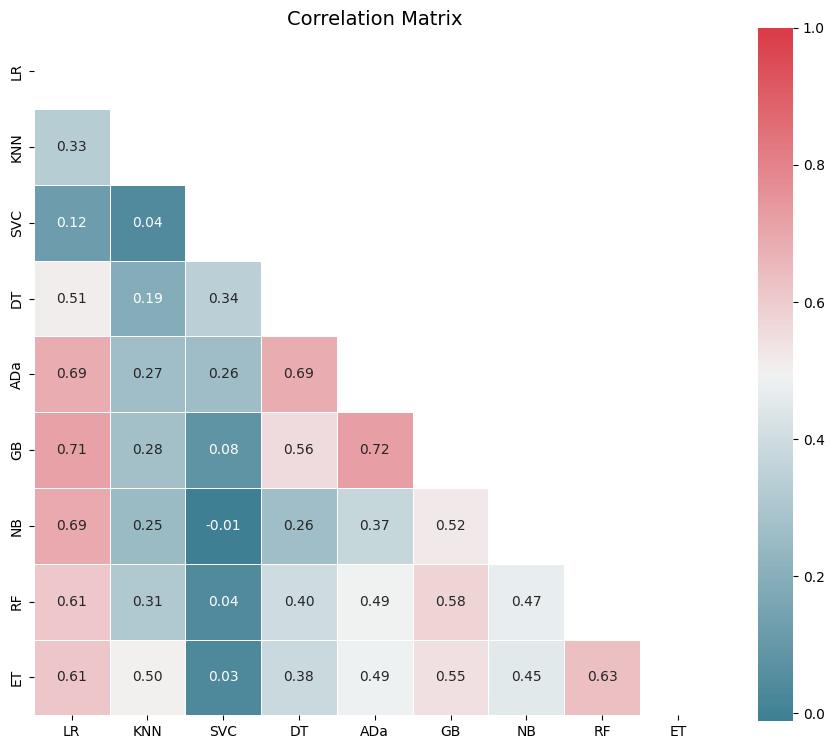

<Axes: title={'center': 'Correlation Matrix'}>

In [ ]:
from mlens.visualization import corrmat
corrmat(P.corr(), inflate=False)

In [ ]:
corrmat(P.apply(lambda predic: 1*(predic >= 0.5) - y_test_sc).corr(), inflate=False)

In [ ]:
base_learners = get_models()
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=6,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.001, 
    random_state=SEED
)

In [ ]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=SEED,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(X_train_sc, y_train_sc)

# Predict the test set
p_sl = sl.predict_proba(X_test_sc)

#print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_test_sc, p_sl[:, 1]))


Fitting 2 layers
Processing layer-1             

In [ ]:
pp = []
for p in p_sl[:, 1]:
    if p>0.5:
        pp.append(1.)
    else:
        pp.append(0.)

In [ ]:
print("\nSuper Learner Accuracy score: %.8f" % (y_test_sc== pp).mean())


Super Learner Accuracy score: 0.85937500
